In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
split = int(0.8*len(x_train))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [4]:
x_train1 = x_train[:split]
y_train1 = y_train[:split]
x_val = x_train[split:]
y_val = y_train[split:]

In [5]:
print(x_train1.shape)
print(y_train1.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [6]:
model = keras.Sequential([
    layers.Input(shape=(32,32,3)),
    
    layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D((2,2),strides = (2,2)),
    
    layers.Conv2D(128,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(128,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D((2,2),strides = (2,2)),

    layers.Conv2D(256,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(256,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(256,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D((2,2),strides = (2,2)),

    layers.Conv2D(512,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(512,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(512,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D((2,2),strides = (2,2)),

    layers.Conv2D(512,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(512,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.Conv2D(512,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D((2,2),strides = (2,2)),

    layers.Flatten(),
    
    layers.Dense(4096,activation = 'relu'),
    layers.Dropout(0.5),
    
    layers.Dense(4096,activation = 'relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10,activation = 'softmax')
])

In [7]:
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.1,patience = 5,mode = 'max',cooldown = 0)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',patience = 3,mode = 'auto')

In [8]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01,momentum = 0.9,),loss = keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [11]:
history = model.fit(x_train1,y_train1,batch_size = 256,epochs = 40,validation_data = (x_val,y_val),callbacks = [lr_reducer,early_stopper])

Epoch 1/40
157/157 [==============================] - 26s 128ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1003 - lr: 0.0100
Epoch 2/40
157/157 [==============================] - 18s 112ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3025 - val_accuracy: 0.0980 - lr: 0.0100
Epoch 3/40
157/157 [==============================] - 17s 111ms/step - loss: 2.3024 - accuracy: 0.1032 - val_loss: 2.3019 - val_accuracy: 0.1439 - lr: 0.0100
Epoch 4/40
157/157 [==============================] - 17s 111ms/step - loss: 2.3003 - accuracy: 0.1198 - val_loss: 2.2938 - val_accuracy: 0.1764 - lr: 0.0100
Epoch 5/40
157/157 [==============================] - 18s 112ms/step - loss: 2.1985 - accuracy: 0.1768 - val_loss: 2.2821 - val_accuracy: 0.1366 - lr: 0.0100
Epoch 6/40
157/157 [==============================] - 18s 112ms/step - loss: 2.0838 - accuracy: 0.1924 - val_loss: 2.0412 - val_accuracy: 0.1985 - lr: 0.0100
Epoch 7/40
157/157 [==============================] 

In [12]:
history1 = model.evaluate(x_test,y_test,batch_size = 256)

40/40 [==============================] - 1s 34ms/step - loss: 1.2892 - accuracy: 0.7538


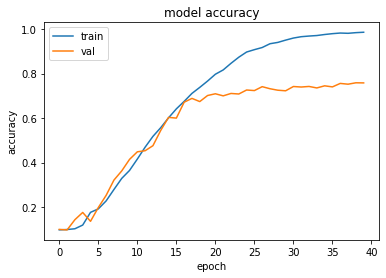

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

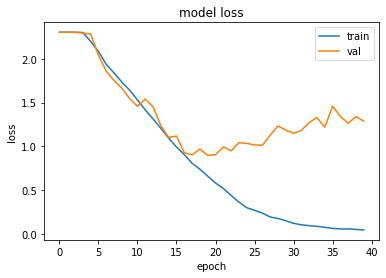

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')